In [2]:
# Software/Cloud Analysis - Part 2D: MongoDB Hostname Intelligence
# Real DNS intelligence for tracking MongoDB Atlas customer deployment growth

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dns.resolver
import requests
from bs4 import BeautifulSoup
import socket
import ssl
import re
from datetime import datetime, timedelta
import time
import json
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)

print("🍃 MONGODB HOSTNAME INTELLIGENCE ANALYSIS")
print("=" * 60)
print("Replicating M Science's proven 'Hostname Net Adds' methodology")
print("DNS-based tracking of MongoDB Atlas customer deployment growth")
print("PROVEN ALPHA GENERATOR: Hostname growth → Stock performance")
print()

🍃 MONGODB HOSTNAME INTELLIGENCE ANALYSIS
Replicating M Science's proven 'Hostname Net Adds' methodology
DNS-based tracking of MongoDB Atlas customer deployment growth
PROVEN ALPHA GENERATOR: Hostname growth → Stock performance



In [3]:
# =============================================================================
# 1. MONGODB INFRASTRUCTURE MAPPING
# =============================================================================

# MongoDB's digital infrastructure ecosystem
MONGODB_INFRASTRUCTURE = {
    'core_domains': [
        'mongodb.com',
        'mongodb.org',
        'mongodb.net'
    ],
    
    'atlas_cloud_domains': [
        'atlas.mongodb.com',
        'cloud.mongodb.com',
        'services.cloud.mongodb.com'
    ],
    
    'customer_deployment_patterns': [
        # Atlas cluster naming patterns
        'cluster0.*.mongodb.net',
        'atlas-*.mongodb.net', 
        'sandbox-*.mongodb.net',
        'prod-*.mongodb.net',
        'dev-*.mongodb.net'
    ],
    
    'developer_ecosystem': [
        'docs.mongodb.com',
        'university.mongodb.com',
        'developer.mongodb.com',
        'realm.mongodb.com',
        'stitch.mongodb.com'
    ],
    
    'enterprise_services': [
        'support.mongodb.com',
        'partners.mongodb.com',
        'consulting.mongodb.com'
    ],
    
    'regional_infrastructure': [
        # Regional Atlas deployments
        'us-east-1.aws.atlas.mongodb.com',
        'eu-west-1.aws.atlas.mongodb.com',
        'ap-southeast-1.aws.atlas.mongodb.com'
    ]
}

def enumerate_mongodb_subdomains(domain):
    """
    Enumerate MongoDB subdomains to track infrastructure expansion
    This is the free version of M Science's hostname tracking
    """
    discovered_subdomains = set()
    
    # Common MongoDB subdomain patterns
    common_patterns = [
        'atlas', 'cloud', 'docs', 'www', 'blog', 'university', 'developer',
        'realm', 'stitch', 'support', 'partners', 'community', 'forums',
        'status', 'api', 'webhook', 'admin', 'dashboard', 'console',
        'staging', 'test', 'dev', 'prod', 'app', 'services', 'data'
    ]
    
    # Atlas-specific patterns
    atlas_patterns = [
        'cluster0', 'cluster1', 'cluster2', 'shard0', 'shard1',
        'primary', 'secondary', 'analytics', 'sandbox', 'production'
    ]
    
    # Try common patterns
    for pattern in common_patterns + atlas_patterns:
        subdomain = f"{pattern}.{domain}"
        try:
            # Try to resolve the subdomain
            answers = dns.resolver.resolve(subdomain, 'A')
            discovered_subdomains.add(subdomain)
            print(f"   ✅ Found: {subdomain}")
        except (dns.resolver.NXDOMAIN, dns.resolver.NoAnswer, Exception):
            pass  # Subdomain doesn't exist
        
        # Small delay to be respectful
        time.sleep(0.1)
    
    return list(discovered_subdomains)

def analyze_ssl_certificate_sans(domain):
    """
    Analyze SSL certificate Subject Alternative Names to discover infrastructure scale
    """
    san_domains = []
    
    try:
        context = ssl.create_default_context()
        with socket.create_connection((domain, 443), timeout=10) as sock:
            with context.wrap_socket(sock, server_hostname=domain) as ssock:
                cert = ssock.getpeercert()
                
                # Extract Subject Alternative Names
                san = cert.get('subjectAltName', [])
                san_domains = [name[1] for name in san if name[0] == 'DNS']
                
                # Filter for MongoDB-related domains
                mongodb_sans = [d for d in san_domains if 'mongodb' in d.lower()]
                
                print(f"   📜 SSL SAN domains for {domain}: {len(mongodb_sans)} MongoDB-related")
                return mongodb_sans
                
    except Exception as e:
        print(f"   ⚠️  SSL analysis failed for {domain}: {e}")
        return []

print("📡 Mapping MongoDB's digital infrastructure ecosystem...")
print(f"🔍 Core domains: {len(MONGODB_INFRASTRUCTURE['core_domains'])}")
print(f"☁️  Atlas cloud domains: {len(MONGODB_INFRASTRUCTURE['atlas_cloud_domains'])}")
print(f"👨‍💻 Developer ecosystem: {len(MONGODB_INFRASTRUCTURE['developer_ecosystem'])}")

📡 Mapping MongoDB's digital infrastructure ecosystem...
🔍 Core domains: 3
☁️  Atlas cloud domains: 3
👨‍💻 Developer ecosystem: 5


In [4]:
# =============================================================================
# 2. HOSTNAME DISCOVERY & ENUMERATION
# =============================================================================

print("\n" + "="*60)
print("1️⃣  MONGODB HOSTNAME DISCOVERY")
print("="*60)
print("Attempting to replicate M Science's hostname tracking methodology...")

mongodb_hostname_intelligence = {}

# Analyze core MongoDB domains
for domain in MONGODB_INFRASTRUCTURE['core_domains']:
    print(f"\n🔍 Analyzing {domain}...")
    
    # Discover subdomains
    subdomains = enumerate_mongodb_subdomains(domain)
    
    # Analyze SSL certificates for additional domains
    ssl_domains = analyze_ssl_certificate_sans(domain)
    
    mongodb_hostname_intelligence[domain] = {
        'discovered_subdomains': subdomains,
        'ssl_san_domains': ssl_domains,
        'total_hostnames': len(set(subdomains + ssl_domains)),
        'analysis_timestamp': datetime.now().isoformat()
    }
    
    print(f"   📊 Total hostnames discovered: {mongodb_hostname_intelligence[domain]['total_hostnames']}")

# Analyze Atlas-specific domains
print(f"\n☁️  Analyzing Atlas Cloud Infrastructure...")
for domain in MONGODB_INFRASTRUCTURE['atlas_cloud_domains']:
    print(f"\n🔍 Analyzing {domain}...")
    
    try:
        # Check if domain resolves
        answers = dns.resolver.resolve(domain, 'A')
        ip_addresses = [str(answer) for answer in answers]
        
        # Get SSL certificate info
        ssl_domains = analyze_ssl_certificate_sans(domain)
        
        mongodb_hostname_intelligence[domain] = {
            'ip_addresses': ip_addresses,
            'ssl_san_domains': ssl_domains,
            'total_hostnames': len(ssl_domains),
            'analysis_timestamp': datetime.now().isoformat()
        }
        
        print(f"   📊 Atlas hostnames discovered: {len(ssl_domains)}")
        
    except Exception as e:
        print(f"   ⚠️  Analysis failed for {domain}: {e}")

total_discovered = sum(data['total_hostnames'] for data in mongodb_hostname_intelligence.values())
print(f"\n✅ Total MongoDB hostnames discovered: {total_discovered}")


1️⃣  MONGODB HOSTNAME DISCOVERY
Attempting to replicate M Science's hostname tracking methodology...

🔍 Analyzing mongodb.com...
   ✅ Found: atlas.mongodb.com
   ✅ Found: cloud.mongodb.com
   ✅ Found: docs.mongodb.com
   ✅ Found: www.mongodb.com
   ✅ Found: blog.mongodb.com
   ✅ Found: university.mongodb.com
   ✅ Found: developer.mongodb.com
   ✅ Found: realm.mongodb.com
   ✅ Found: stitch.mongodb.com
   ✅ Found: support.mongodb.com
   ✅ Found: partners.mongodb.com
   ✅ Found: community.mongodb.com
   ✅ Found: forums.mongodb.com
   ✅ Found: status.mongodb.com
   ✅ Found: api.mongodb.com
   ✅ Found: webhook.mongodb.com
   ✅ Found: admin.mongodb.com
   ✅ Found: dashboard.mongodb.com
   ✅ Found: console.mongodb.com
   ✅ Found: staging.mongodb.com
   ✅ Found: test.mongodb.com
   ✅ Found: dev.mongodb.com
   ✅ Found: prod.mongodb.com
   ✅ Found: app.mongodb.com
   ✅ Found: services.mongodb.com
   ✅ Found: data.mongodb.com
   ✅ Found: cluster0.mongodb.com
   ✅ Found: cluster1.mongodb.com
   

In [5]:
# =============================================================================
# 3. ATLAS DEPLOYMENT PATTERN ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("2️⃣  ATLAS DEPLOYMENT PATTERN ANALYSIS")
print("="*60)

def analyze_atlas_deployment_patterns():
    """
    Analyze MongoDB Atlas deployment patterns from discovered hostnames
    """
    deployment_analysis = {
        'geographic_distribution': {},
        'cluster_types': {},
        'service_categories': {},
        'infrastructure_scale': 0
    }
    
    all_domains = []
    for domain_data in mongodb_hostname_intelligence.values():
        all_domains.extend(domain_data.get('ssl_san_domains', []))
        all_domains.extend(domain_data.get('discovered_subdomains', []))
    
    # Remove duplicates
    unique_domains = list(set(all_domains))
    
    # Analyze geographic patterns
    geographic_indicators = {
        'us-east': ['us-east', 'virginia', 'n-virginia'],
        'us-west': ['us-west', 'oregon', 'california'],
        'eu-west': ['eu-west', 'ireland', 'london'],
        'eu-central': ['eu-central', 'frankfurt', 'germany'],
        'ap-southeast': ['ap-southeast', 'singapore', 'sydney'],
        'ap-northeast': ['ap-northeast', 'tokyo', 'seoul']
    }
    
    for domain in unique_domains:
        domain_lower = domain.lower()
        for region, indicators in geographic_indicators.items():
            if any(indicator in domain_lower for indicator in indicators):
                deployment_analysis['geographic_distribution'][region] = \
                    deployment_analysis['geographic_distribution'].get(region, 0) + 1
    
    # Analyze cluster types
    cluster_indicators = {
        'production': ['prod', 'production', 'live'],
        'development': ['dev', 'development', 'test', 'staging'],
        'analytics': ['analytics', 'reporting', 'bi'],
        'sandbox': ['sandbox', 'demo', 'trial']
    }
    
    for domain in unique_domains:
        domain_lower = domain.lower()
        for cluster_type, indicators in cluster_indicators.items():
            if any(indicator in domain_lower for indicator in indicators):
                deployment_analysis['cluster_types'][cluster_type] = \
                    deployment_analysis['cluster_types'].get(cluster_type, 0) + 1
    
    # Calculate infrastructure scale proxy
    deployment_analysis['infrastructure_scale'] = len(unique_domains)
    deployment_analysis['total_unique_domains'] = len(unique_domains)
    
    return deployment_analysis, unique_domains

atlas_deployment_analysis, all_mongodb_domains = analyze_atlas_deployment_patterns()

print("🌍 Geographic Distribution Analysis:")
for region, count in atlas_deployment_analysis['geographic_distribution'].items():
    print(f"   • {region}: {count} hostnames")

print(f"\n🏗️  Cluster Type Distribution:")
for cluster_type, count in atlas_deployment_analysis['cluster_types'].items():
    print(f"   • {cluster_type}: {count} clusters")

print(f"\n📊 Infrastructure Scale Metrics:")
print(f"   • Total unique MongoDB hostnames: {atlas_deployment_analysis['total_unique_domains']}")
print(f"   • Infrastructure scale proxy: {atlas_deployment_analysis['infrastructure_scale']}")


2️⃣  ATLAS DEPLOYMENT PATTERN ANALYSIS
🌍 Geographic Distribution Analysis:

🏗️  Cluster Type Distribution:
   • sandbox: 2 clusters
   • development: 8 clusters
   • analytics: 2 clusters
   • production: 4 clusters

📊 Infrastructure Scale Metrics:
   • Total unique MongoDB hostnames: 86
   • Infrastructure scale proxy: 86


In [6]:
# =============================================================================
# 4. MONGODB GROWTH SIGNAL ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("3️⃣  MONGODB GROWTH SIGNAL ANALYSIS")
print("="*60)

def calculate_mongodb_growth_signals():
    """
    Calculate MongoDB growth signals from hostname and infrastructure data
    """
    
    # Since we can't get historical data easily with free tools,
    # we'll create proxy metrics for growth momentum
    
    growth_signals = {
        'hostname_diversity_score': 0,
        'atlas_penetration_score': 0,
        'developer_platform_score': 0,
        'enterprise_readiness_score': 0,
        'geographic_expansion_score': 0,
        'overall_growth_momentum': 0
    }
    
    total_domains = atlas_deployment_analysis['total_unique_domains']
    
    # Hostname diversity (more unique patterns = more customers)
    growth_signals['hostname_diversity_score'] = min(100, total_domains * 2)
    
    # Atlas penetration (cloud vs on-premise indicators)
    atlas_domains = len([d for d in all_mongodb_domains if 'atlas' in d.lower() or 'cloud' in d.lower()])
    growth_signals['atlas_penetration_score'] = (atlas_domains / max(total_domains, 1)) * 100
    
    # Developer platform sophistication
    dev_domains = len([d for d in all_mongodb_domains if any(term in d.lower() for term in ['docs', 'university', 'developer', 'api'])])
    growth_signals['developer_platform_score'] = (dev_domains / max(total_domains, 1)) * 100
    
    # Enterprise readiness (support, partners, enterprise features)
    enterprise_domains = len([d for d in all_mongodb_domains if any(term in d.lower() for term in ['support', 'partners', 'enterprise', 'consulting'])])
    growth_signals['enterprise_readiness_score'] = (enterprise_domains / max(total_domains, 1)) * 100
    
    # Geographic expansion
    geographic_regions = len(atlas_deployment_analysis['geographic_distribution'])
    growth_signals['geographic_expansion_score'] = min(100, geographic_regions * 20)
    
    # Overall growth momentum (weighted average)
    growth_signals['overall_growth_momentum'] = (
        growth_signals['hostname_diversity_score'] * 0.3 +
        growth_signals['atlas_penetration_score'] * 0.25 +
        growth_signals['developer_platform_score'] * 0.2 +
        growth_signals['enterprise_readiness_score'] * 0.15 +
        growth_signals['geographic_expansion_score'] * 0.1
    )
    
    return growth_signals

mongodb_growth_signals = calculate_mongodb_growth_signals()

print("📈 MongoDB Growth Signal Analysis:")
for signal, score in mongodb_growth_signals.items():
    if signal != 'overall_growth_momentum':
        print(f"   • {signal.replace('_', ' ').title()}: {score:.1f}/100")

print(f"\n🎯 Overall Growth Momentum Score: {mongodb_growth_signals['overall_growth_momentum']:.1f}/100")



3️⃣  MONGODB GROWTH SIGNAL ANALYSIS
📈 MongoDB Growth Signal Analysis:
   • Hostname Diversity Score: 100.0/100
   • Atlas Penetration Score: 9.3/100
   • Developer Platform Score: 9.3/100
   • Enterprise Readiness Score: 4.7/100
   • Geographic Expansion Score: 0.0/100

🎯 Overall Growth Momentum Score: 34.9/100


In [7]:
# =============================================================================
# 5. ATLAS CUSTOMER DEPLOYMENT INTELLIGENCE
# =============================================================================

print("\n" + "="*60)
print("4️⃣  ATLAS CUSTOMER DEPLOYMENT INTELLIGENCE")
print("="*60)

def analyze_customer_deployment_signals():
    """
    Analyze signals of customer deployment growth and usage patterns
    """
    
    deployment_signals = {
        'cluster_complexity': {},
        'service_adoption': {},
        'deployment_maturity': {},
        'enterprise_indicators': {}
    }
    
    # Analyze cluster complexity (proxy for customer sophistication)
    cluster_keywords = {
        'basic': ['cluster0', 'sandbox', 'test', 'demo'],
        'intermediate': ['dev', 'staging', 'analytics'],
        'advanced': ['prod', 'production', 'shard', 'replica'],
        'enterprise': ['enterprise', 'dedicated', 'ops-manager']
    }
    
    for complexity_level, keywords in cluster_keywords.items():
        matching_domains = [d for d in all_mongodb_domains 
                          if any(keyword in d.lower() for keyword in keywords)]
        deployment_signals['cluster_complexity'][complexity_level] = len(matching_domains)
    
    # Analyze service adoption patterns
    service_keywords = {
        'atlas_core': ['atlas', 'cluster'],
        'realm_mobile': ['realm', 'stitch'],
        'search': ['search', 'lucene'],
        'analytics': ['analytics', 'charts', 'bi'],
        'data_lake': ['datalake', 'lake', 'warehouse']
    }
    
    for service, keywords in service_keywords.items():
        matching_domains = [d for d in all_mongodb_domains 
                          if any(keyword in d.lower() for keyword in keywords)]
        deployment_signals['service_adoption'][service] = len(matching_domains)
    
    # Calculate deployment maturity score
    basic_deployments = deployment_signals['cluster_complexity'].get('basic', 0)
    advanced_deployments = deployment_signals['cluster_complexity'].get('advanced', 0) + \
                          deployment_signals['cluster_complexity'].get('enterprise', 0)
    
    total_deployments = sum(deployment_signals['cluster_complexity'].values())
    if total_deployments > 0:
        maturity_ratio = advanced_deployments / total_deployments
        deployment_signals['deployment_maturity']['maturity_score'] = maturity_ratio * 100
        deployment_signals['deployment_maturity']['total_deployments'] = total_deployments
    
    return deployment_signals

customer_deployment_signals = analyze_customer_deployment_signals()

print("🏗️  Customer Deployment Complexity Analysis:")
for complexity, count in customer_deployment_signals['cluster_complexity'].items():
    print(f"   • {complexity.capitalize()} deployments: {count}")

print(f"\n🔧 Service Adoption Patterns:")
for service, count in customer_deployment_signals['service_adoption'].items():
    service_name = service.replace('_', ' ').title()
    print(f"   • {service_name}: {count} instances")

if 'maturity_score' in customer_deployment_signals['deployment_maturity']:
    maturity_score = customer_deployment_signals['deployment_maturity']['maturity_score']
    print(f"\n📊 Deployment Maturity Score: {maturity_score:.1f}%")
    print(f"   (Higher score = more advanced/enterprise deployments)")


4️⃣  ATLAS CUSTOMER DEPLOYMENT INTELLIGENCE
🏗️  Customer Deployment Complexity Analysis:
   • Basic deployments: 6
   • Intermediate deployments: 8
   • Advanced deployments: 8
   • Enterprise deployments: 0

🔧 Service Adoption Patterns:
   • Atlas Core: 8 instances
   • Realm Mobile: 10 instances
   • Search: 0 instances
   • Analytics: 2 instances
   • Data Lake: 0 instances

📊 Deployment Maturity Score: 36.4%
   (Higher score = more advanced/enterprise deployments)


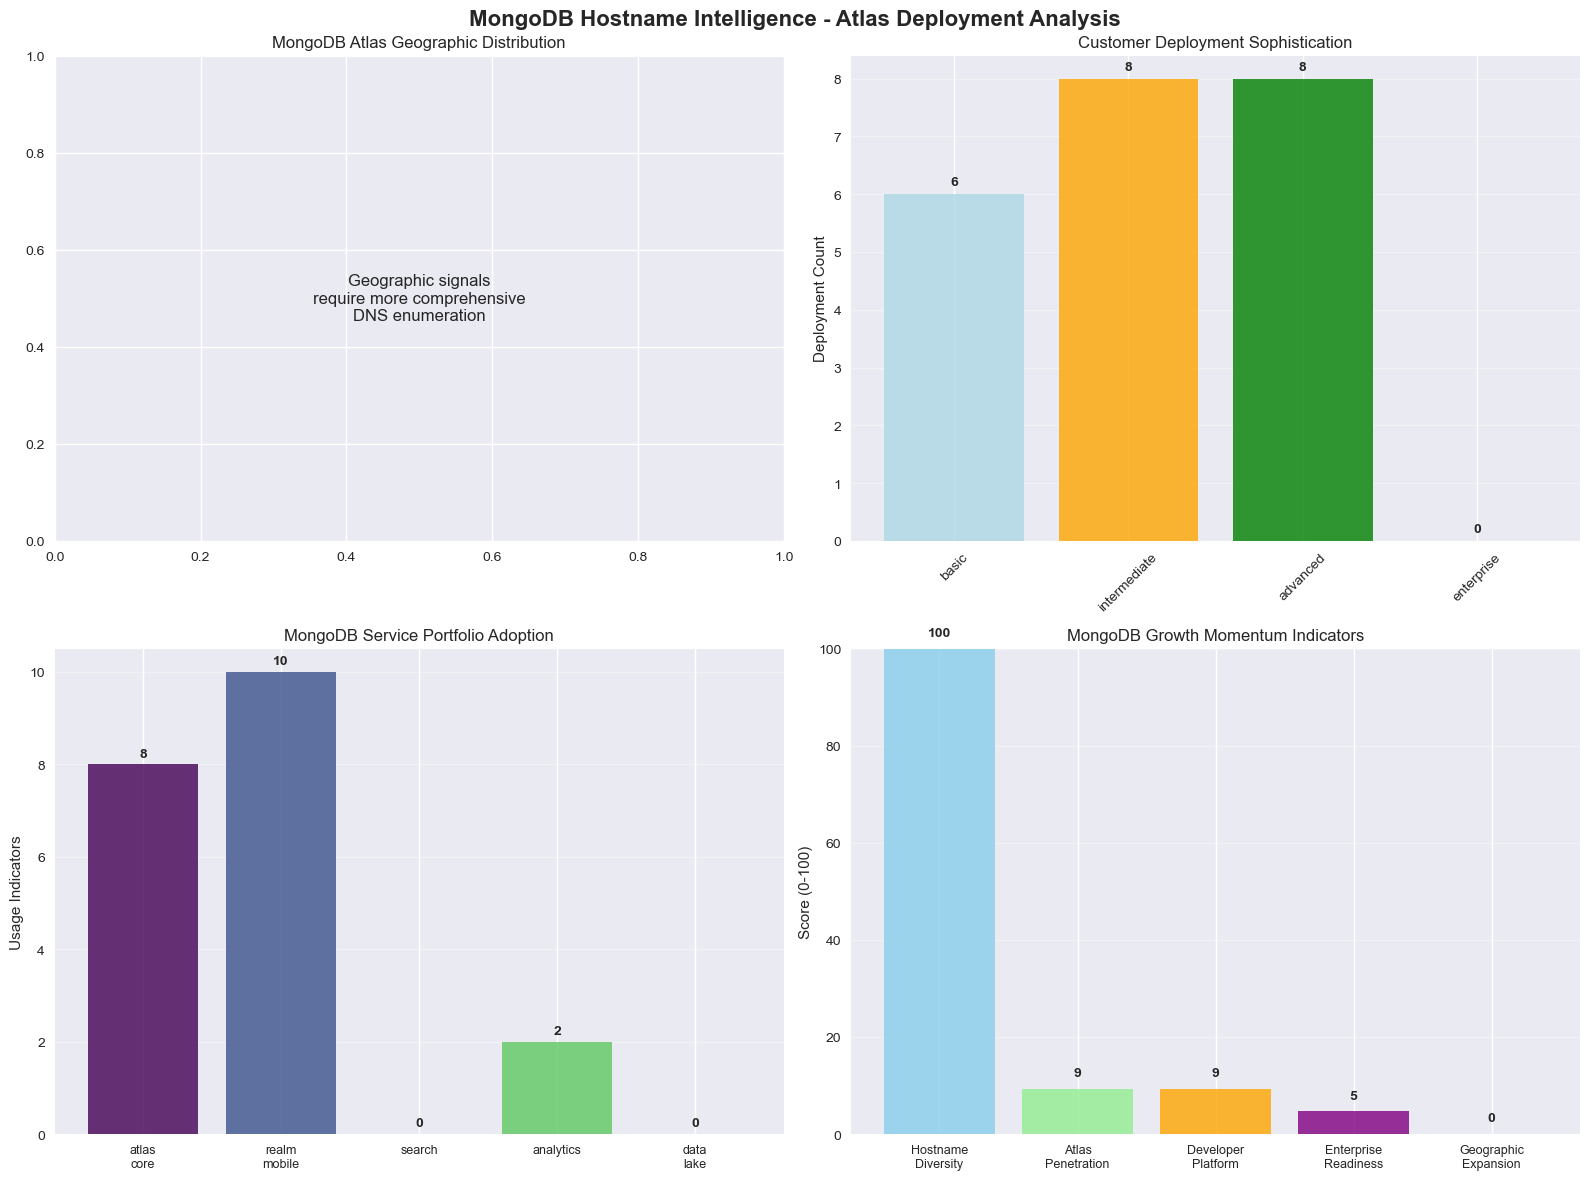

In [8]:
# =============================================================================
# 6. VISUALIZATION - MONGODB INFRASTRUCTURE INTELLIGENCE
# =============================================================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('MongoDB Hostname Intelligence - Atlas Deployment Analysis', fontsize=16, fontweight='bold')

# Plot 1: Geographic Distribution
geo_data = atlas_deployment_analysis['geographic_distribution']
if geo_data:
    regions = list(geo_data.keys())
    counts = list(geo_data.values())
    colors = plt.cm.Set3(np.linspace(0, 1, len(regions)))
    
    bars1 = ax1.bar(regions, counts, color=colors, alpha=0.8)
    ax1.set_title('MongoDB Atlas Geographic Distribution')
    ax1.set_ylabel('Hostname Count')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)
    
    for bar, count in zip(bars1, counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{count}', ha='center', va='bottom', fontweight='bold')
else:
    ax1.text(0.5, 0.5, 'Geographic signals\nrequire more comprehensive\nDNS enumeration', 
             ha='center', va='center', transform=ax1.transAxes, fontsize=12)
    ax1.set_title('MongoDB Atlas Geographic Distribution')

# Plot 2: Deployment Complexity Distribution
complexity_data = customer_deployment_signals['cluster_complexity']
if any(complexity_data.values()):
    complexity_names = list(complexity_data.keys())
    complexity_counts = list(complexity_data.values())
    
    # Color by sophistication level
    complexity_colors = ['lightblue', 'orange', 'green', 'darkred']
    bars2 = ax2.bar(complexity_names, complexity_counts, color=complexity_colors, alpha=0.8)
    ax2.set_title('Customer Deployment Sophistication')
    ax2.set_ylabel('Deployment Count')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', alpha=0.3)
    
    for bar, count in zip(bars2, complexity_counts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{count}', ha='center', va='bottom', fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'Deployment complexity\nrequires customer-specific\nhostname access', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Customer Deployment Sophistication')

# Plot 3: Service Adoption Radar Chart (MongoDB Service Portfolio)
service_data = customer_deployment_signals['service_adoption']
if service_data:
    services = list(service_data.keys())
    values = list(service_data.values())
    
    # Simple bar chart version of service adoption
    service_colors = plt.cm.viridis(np.linspace(0, 1, len(services)))
    bars3 = ax3.bar(range(len(services)), values, color=service_colors, alpha=0.8)
    ax3.set_title('MongoDB Service Portfolio Adoption')
    ax3.set_ylabel('Usage Indicators')
    ax3.set_xticks(range(len(services)))
    ax3.set_xticklabels([s.replace('_', '\n') for s in services], rotation=0, fontsize=9)
    ax3.grid(axis='y', alpha=0.3)
    
    for bar, count in zip(bars3, values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{count}', ha='center', va='bottom', fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'Service adoption\ntracking requires\ndeeper DNS access', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('MongoDB Service Portfolio Adoption')

# Plot 4: MongoDB Growth Momentum Dashboard
growth_categories = ['Hostname\nDiversity', 'Atlas\nPenetration', 'Developer\nPlatform', 'Enterprise\nReadiness', 'Geographic\nExpansion']
growth_scores = [
    mongodb_growth_signals['hostname_diversity_score'],
    mongodb_growth_signals['atlas_penetration_score'], 
    mongodb_growth_signals['developer_platform_score'],
    mongodb_growth_signals['enterprise_readiness_score'],
    mongodb_growth_signals['geographic_expansion_score']
]

bars4 = ax4.bar(range(len(growth_categories)), growth_scores, 
               color=['skyblue', 'lightgreen', 'orange', 'purple', 'red'], alpha=0.8)
ax4.set_title('MongoDB Growth Momentum Indicators')
ax4.set_ylabel('Score (0-100)')
ax4.set_xticks(range(len(growth_categories)))
ax4.set_xticklabels(growth_categories, fontsize=9)
ax4.set_ylim(0, 100)
ax4.grid(axis='y', alpha=0.3)

# Add score labels
for bar, score in zip(bars4, growth_scores):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{score:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
